[2.80078125 0.         0.         ... 0.         0.         0.        ]


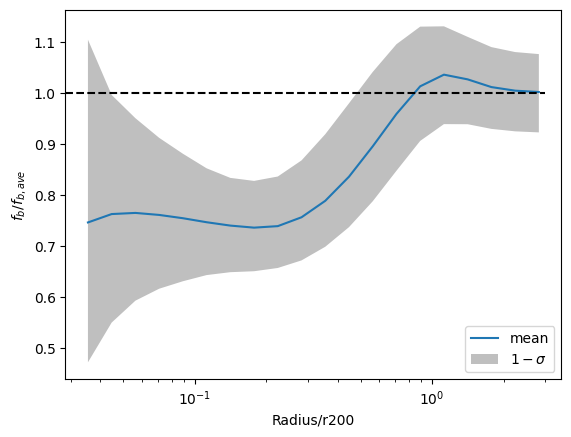

In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
f=h5py.File("/Users/24756376/data/Flamingo/L1000N0900/halos_ranked.hdf5", 'r')
r200=np.array([f['r200']])[0]
id=np.array(f['id'])
f.close()
print(r200)
r200=r200[id<=0]
f=h5py.File("/Users/24756376/data/Flamingo/L1000N0900/profile.hdf5", 'r')
dm=np.array(f['dm'])
g=np.array(f['g'])
s=np.array(f['s'])
bins=np.array(f['bins'])
f.close()


ratio=(g*8.56+s*6.174)/dm/45.2/(0.02222/0.7**2/0.316)
fig=plt.figure()
ax=fig.add_subplot(111)
ax.set_xscale('log')
#$ax.set_yscale('log')
#for i in tqdm(range(len(dm))):
#    ax.plot(bins, g[i]/dm[i])
average_ratio=np.mean(ratio, axis=0)

per=np.percentile(ratio, [16, 50, 84], axis=0)


    
ax.plot(bins, per[1], label='mean')

ax.fill_between(bins, per[0],per[2], facecolor='gray', alpha=.5, label=r"$1-\sigma$")
ax.legend()
ax.hlines(1,0,3,linestyles="dashed",colors='k')

ax.set_xlabel('Radius/r200')
ax.set_ylabel(r'$f_{b}$/$f_{b,ave}$')
plt.savefig("/Users/24756376/plot/Flamingo/L1000N0900/profile.png")